In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/RC PRASAD/Desktop/python ws/kaggle como/financial-performance-prediction/train.csv')
test = pd.read_csv('C:/Users/RC PRASAD/Desktop/python ws/kaggle como/financial-performance-prediction/test.csv')

In [3]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (1624, 212)
Test shape: (406, 203)


In [6]:
targets_names = [col for col in train if col not in test]
print(f'Target columns: {targets_names}')

Target columns: ['Q0_TOTAL_ASSETS', 'Q0_TOTAL_LIABILITIES', 'Q0_TOTAL_STOCKHOLDERS_EQUITY', 'Q0_GROSS_PROFIT', 'Q0_COST_OF_REVENUES', 'Q0_REVENUES', 'Q0_OPERATING_INCOME', 'Q0_OPERATING_EXPENSES', 'Q0_EBITDA']


In [7]:
train.dtypes.value_counts()

float64    207
object       4
int64        1
dtype: int64

In [8]:
test.dtypes.value_counts()

float64    198
object       4
int64        1
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Columns: 212 entries, Id to Q10_fiscal_year_end
dtypes: float64(207), int64(1), object(4)
memory usage: 2.6+ MB


In [10]:
train.describe()

,Id,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,forwardPE,floatShares,...,Q10_TOTAL_STOCKHOLDERS_EQUITY,Q10_NET_INCOME,Q10_GROSS_PROFIT,Q10_COST_OF_REVENUES,Q10_REVENUES,Q10_OPERATING_INCOME,Q10_OPERATING_EXPENSES,Q10_EBITDA,Q10_DEPRECIATION_AND_AMORTIZATION,Q10_fiscal_year_end
count,1624.000000,1544.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,722.000000,1436.000000,1.598000e+03,...,1.449000e+03,1.305000e+03,1.423000e+03,1.321000e+03,1.325000e+03,1.427000e+03,1.430000e+03,1.421000e+03,1.419000e+03,1624.000000
mean,1012.267857,9345.583549,5.564103,5.654288,5.797524,5.582670,5.733864,inf,inf,2.260694e+08,...,2.165070e+09,7.483623e+07,4.547676e+08,8.925653e+08,1.355588e+09,1.195989e+08,3.839765e+08,6.886442e+07,-5.136951e+07,0.004926
std,585.242103,34273.510554,2.850260,2.857969,2.839455,2.769783,2.879112,NaN,NaN,3.579918e+09,...,8.504373e+09,5.173134e+08,2.242473e+09,4.225508e+09,5.776379e+09,6.788749e+08,1.677897e+09,1.775192e+09,1.728854e+09,0.070035
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000086,-2085.000000,1.034690e+05,...,-1.805800e+10,-3.944000e+09,-2.170800e+10,-1.880579e+09,-4.500000e+06,-4.475000e+09,-1.439000e+06,-5.090500e+10,-5.418200e+10,0.000000
25%,511.750000,141.000000,3.000000,3.000000,3.000000,3.000000,3.000000,12.575714,-2.843448,1.500746e+07,...,2.206300e+07,-1.088800e+07,1.615874e+06,1.202000e+06,9.223996e+06,-7.866176e+06,7.696162e+06,-1.061200e+07,0.000000e+00,0.000000
50%,1009.500000,878.000000,6.000000,6.000000,6.000000,6.000000,6.000000,21.599812,9.378077,4.103422e+07,...,2.365370e+08,-2.036240e+05,3.437100e+07,2.986900e+07,1.050790e+08,-5.481500e+04,3.821400e+07,-2.862240e+05,0.000000e+00,0.000000
75%,1519.250000,5040.750000,8.000000,8.000000,8.000000,8.000000,8.000000,37.157093,19.998548,1.062949e+08,...,9.976180e+08,2.411300e+07,2.109785e+08,3.116390e+08,6.035310e+08,4.251150e+07,1.740402e+08,3.760000e+07,0.000000e+00,0.000000
max,2029.000000,500000.000000,10.000000,10.000000,10.000000,10.000000,10.000000,inf,inf,1.421357e+11,...,1.622829e+11,9.497000e+09,2.957200e+10,6.617700e+10,9.240000e+10,1.137800e+10,2.919700e+10,2.656800e+10,2.551400e+10,1.000000


In [11]:
train['is_train'] = True
test['is_train'] = False
df = pd.concat([train, test], axis = 0, ignore_index = True)

In [12]:
df.select_dtypes(include = 'O')

,industry,sector,recommendationKey,financialCurrency
0,Personal Services,Consumer Cyclical,strong_buy,USD
1,Building Products & Equipment,Industrials,buy,USD
2,NaN,Unknown,NaN,NaN
3,Scientific & Technical Instruments,Technology,hold,USD
4,Drug Manufacturers - Specialty & Generic,Healthcare,buy,USD
...,...,...,...,...
2025,Packaged Foods,Consumer Defensive,hold,USD
2026,NaN,Unknown,NaN,NaN
2027,Medical Devices,Healthcare,buy,USD
2028,Drug Manufacturers - Specialty & Generic,Healthcare,buy,USD


In [13]:
df.isnull().sum()

Id                                     0
industry                              27
sector                                 0
fullTimeEmployees                    102
auditRisk                            625
                                    ... 
Q10_OPERATING_EXPENSES               261
Q10_EBITDA                           273
Q10_DEPRECIATION_AND_AMORTIZATION    279
Q10_fiscal_year_end                    0
is_train                               0
Length: 213, dtype: int64

In [14]:
def binarize(df, col):
    uniques = list(df[col].dropna().unique())
    df[col] = [1 if val == uniques[0] else 0 for val in df[col]]
    return df

In [15]:
def one_hot_encode(df, col):
    dummies = pd.get_dummies(df[col], prefix = col).astype(int)
    df.drop(col, axis = 1, inplace = True)
    df = pd.concat([df, dummies], axis = 1)
    return df

In [16]:
def factorize(df, col):
    mapping = {name: ix for ix, name in enumerate(df[col].unique())}
    df[col] = df[col].map(mapping)
    return df

In [17]:
df = binarize(df, 'financialCurrency')
print(df['financialCurrency'].head())

0    1
1    1
2    0
3    1
4    1
Name: financialCurrency, dtype: int64


In [19]:
print(df.shape)
df = one_hot_encode(df, 'sector')
df = one_hot_encode(df, 'recommendationKey')
print(df.shape)

(2030, 213)
(2030, 227)


In [20]:
df = factorize(df, 'industry')
print(df.dtypes.value_counts())

float64    207
int32       16
int64        3
bool         1
dtype: int64


In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
df.isnull().sum()

Id                                  0
industry                            0
fullTimeEmployees                 102
auditRisk                         625
boardRisk                         625
                                 ... 
recommendationKey_hold              0
recommendationKey_none              0
recommendationKey_sell              0
recommendationKey_strong_buy        0
recommendationKey_underperform      0
Length: 227, dtype: int64

In [24]:
print('Missing data stats:\n')
under_10_percent = 0
ten_to_20_percent = 0
twenty_to_50_percent = 0
over_50_percent = 0
for col in df:
    if np.any(df[col].isnull()):
        percent_missing = np.round(100*df[col].isnull().sum()/len(df),2)
        if percent_missing < 10:
            under_10_percent+=1
        elif 10 <= percent_missing < 20:
            ten_to_20_percent+=1
        elif 20 <= percent_missing < 50:
            twenty_to_50_percent+=1
        else:
            over_50_percent+=1
        
print(f'ncols with under 10% missing data:\t{under_10_percent}')
print(f'ncols with 10-20% missing data:\t\t{ten_to_20_percent}')
print(f'ncols with 20-50% missing data:\t\t{twenty_to_50_percent}')
print(f'ncols with over 50% missing data:\t{over_50_percent}')

Missing data stats:

ncols with under 10% missing data:	134
ncols with 10-20% missing data:		44
ncols with 20-50% missing data:		16
ncols with over 50% missing data:	1


In [25]:
df[df == np.inf].count().sum()

17

In [26]:
train[targets_names].isnull().sum()

Q0_TOTAL_ASSETS                 0
Q0_TOTAL_LIABILITIES            0
Q0_TOTAL_STOCKHOLDERS_EQUITY    0
Q0_GROSS_PROFIT                 0
Q0_COST_OF_REVENUES             0
Q0_REVENUES                     0
Q0_OPERATING_INCOME             0
Q0_OPERATING_EXPENSES           0
Q0_EBITDA                       0
dtype: int64

In [27]:
def impute_missing_by_median(df):
    print(f'Missing values before imputation: {sum(df.isnull().sum())}')
    # first replace inf and -inf with nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # then impute nan by median
    for col in df:
        if np.any(df[col].isnull()):
            df[col].fillna(df[col].median(), inplace = True)
    print(f'Missing values after imputation: {sum(df.isnull().sum())}')
    return df

In [28]:
df = impute_missing_by_median(df)

Missing values before imputation: 28653
Missing values after imputation: 0


In [29]:
train = df[df['is_train'] == True]
test = df[df['is_train'] == False]
train.drop('is_train', axis = 1, inplace=True)
test.drop('is_train', axis = 1, inplace=True)
test.reset_index(drop = True, inplace = True)

test.drop(targets_names, axis = 1, inplace = True)
targets = train[targets_names].copy()
train.drop(targets_names, axis = 1, inplace = True)

C:\Users\RC PRASAD\AppData\Local\Temp\ipykernel_8820\4229629428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('is_train', axis = 1, inplace=True)
C:\Users\RC PRASAD\AppData\Local\Temp\ipykernel_8820\4229629428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('is_train', axis = 1, inplace=True)
C:\Users\RC PRASAD\AppData\Local\Temp\ipykernel_8820\4229629428.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
targets

,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA
0,1.192950e+09,1.055816e+09,1.371340e+08,25598000.0,6.189900e+07,4.299200e+07,1.522200e+07,10383000.0,15215000.0
1,1.219954e+09,8.350460e+08,3.849080e+08,111786000.0,2.177960e+08,3.295820e+08,2.890800e+07,85522000.0,26264000.0
2,-1.358200e+11,-3.797200e+10,-9.784800e+10,-435000000.0,4.445000e+09,4.010000e+09,-1.472000e+09,219000000.0,-654000000.0
3,8.329800e+07,1.604000e+07,-3.163300e+07,494000.0,3.339000e+06,3.833000e+06,-1.234800e+07,12842000.0,-12348000.0
4,1.485460e+08,5.655500e+07,9.199100e+07,1761000.0,-2.375000e+06,-6.140000e+05,-1.009800e+07,11859000.0,-10098000.0
...,...,...,...,...,...,...,...,...,...
1619,3.539600e+08,1.997590e+08,1.542010e+08,48741000.0,4.569300e+07,9.443400e+07,2.616000e+06,46125000.0,2616000.0
1620,1.061530e+08,3.949300e+07,6.811700e+07,1077000.0,1.690000e+05,1.246000e+06,-6.705000e+06,7782000.0,-6705000.0
1621,5.203150e+08,3.807960e+08,3.233080e+08,27808000.0,1.123840e+08,1.401920e+08,7.061000e+06,9417000.0,18391000.0
1622,1.997210e+08,2.692100e+07,1.728000e+08,0.0,0.000000e+00,0.000000e+00,-3.391900e+07,33919000.0,-33919000.0


In [31]:
ind_train = df.industry.value_counts().sort_values(ascending=True)
ind_train

113      1
90       1
50       2
41       2
106      2
      ... 
4       65
24      74
13     108
18     119
20     273
Name: industry, Length: 114, dtype: int64

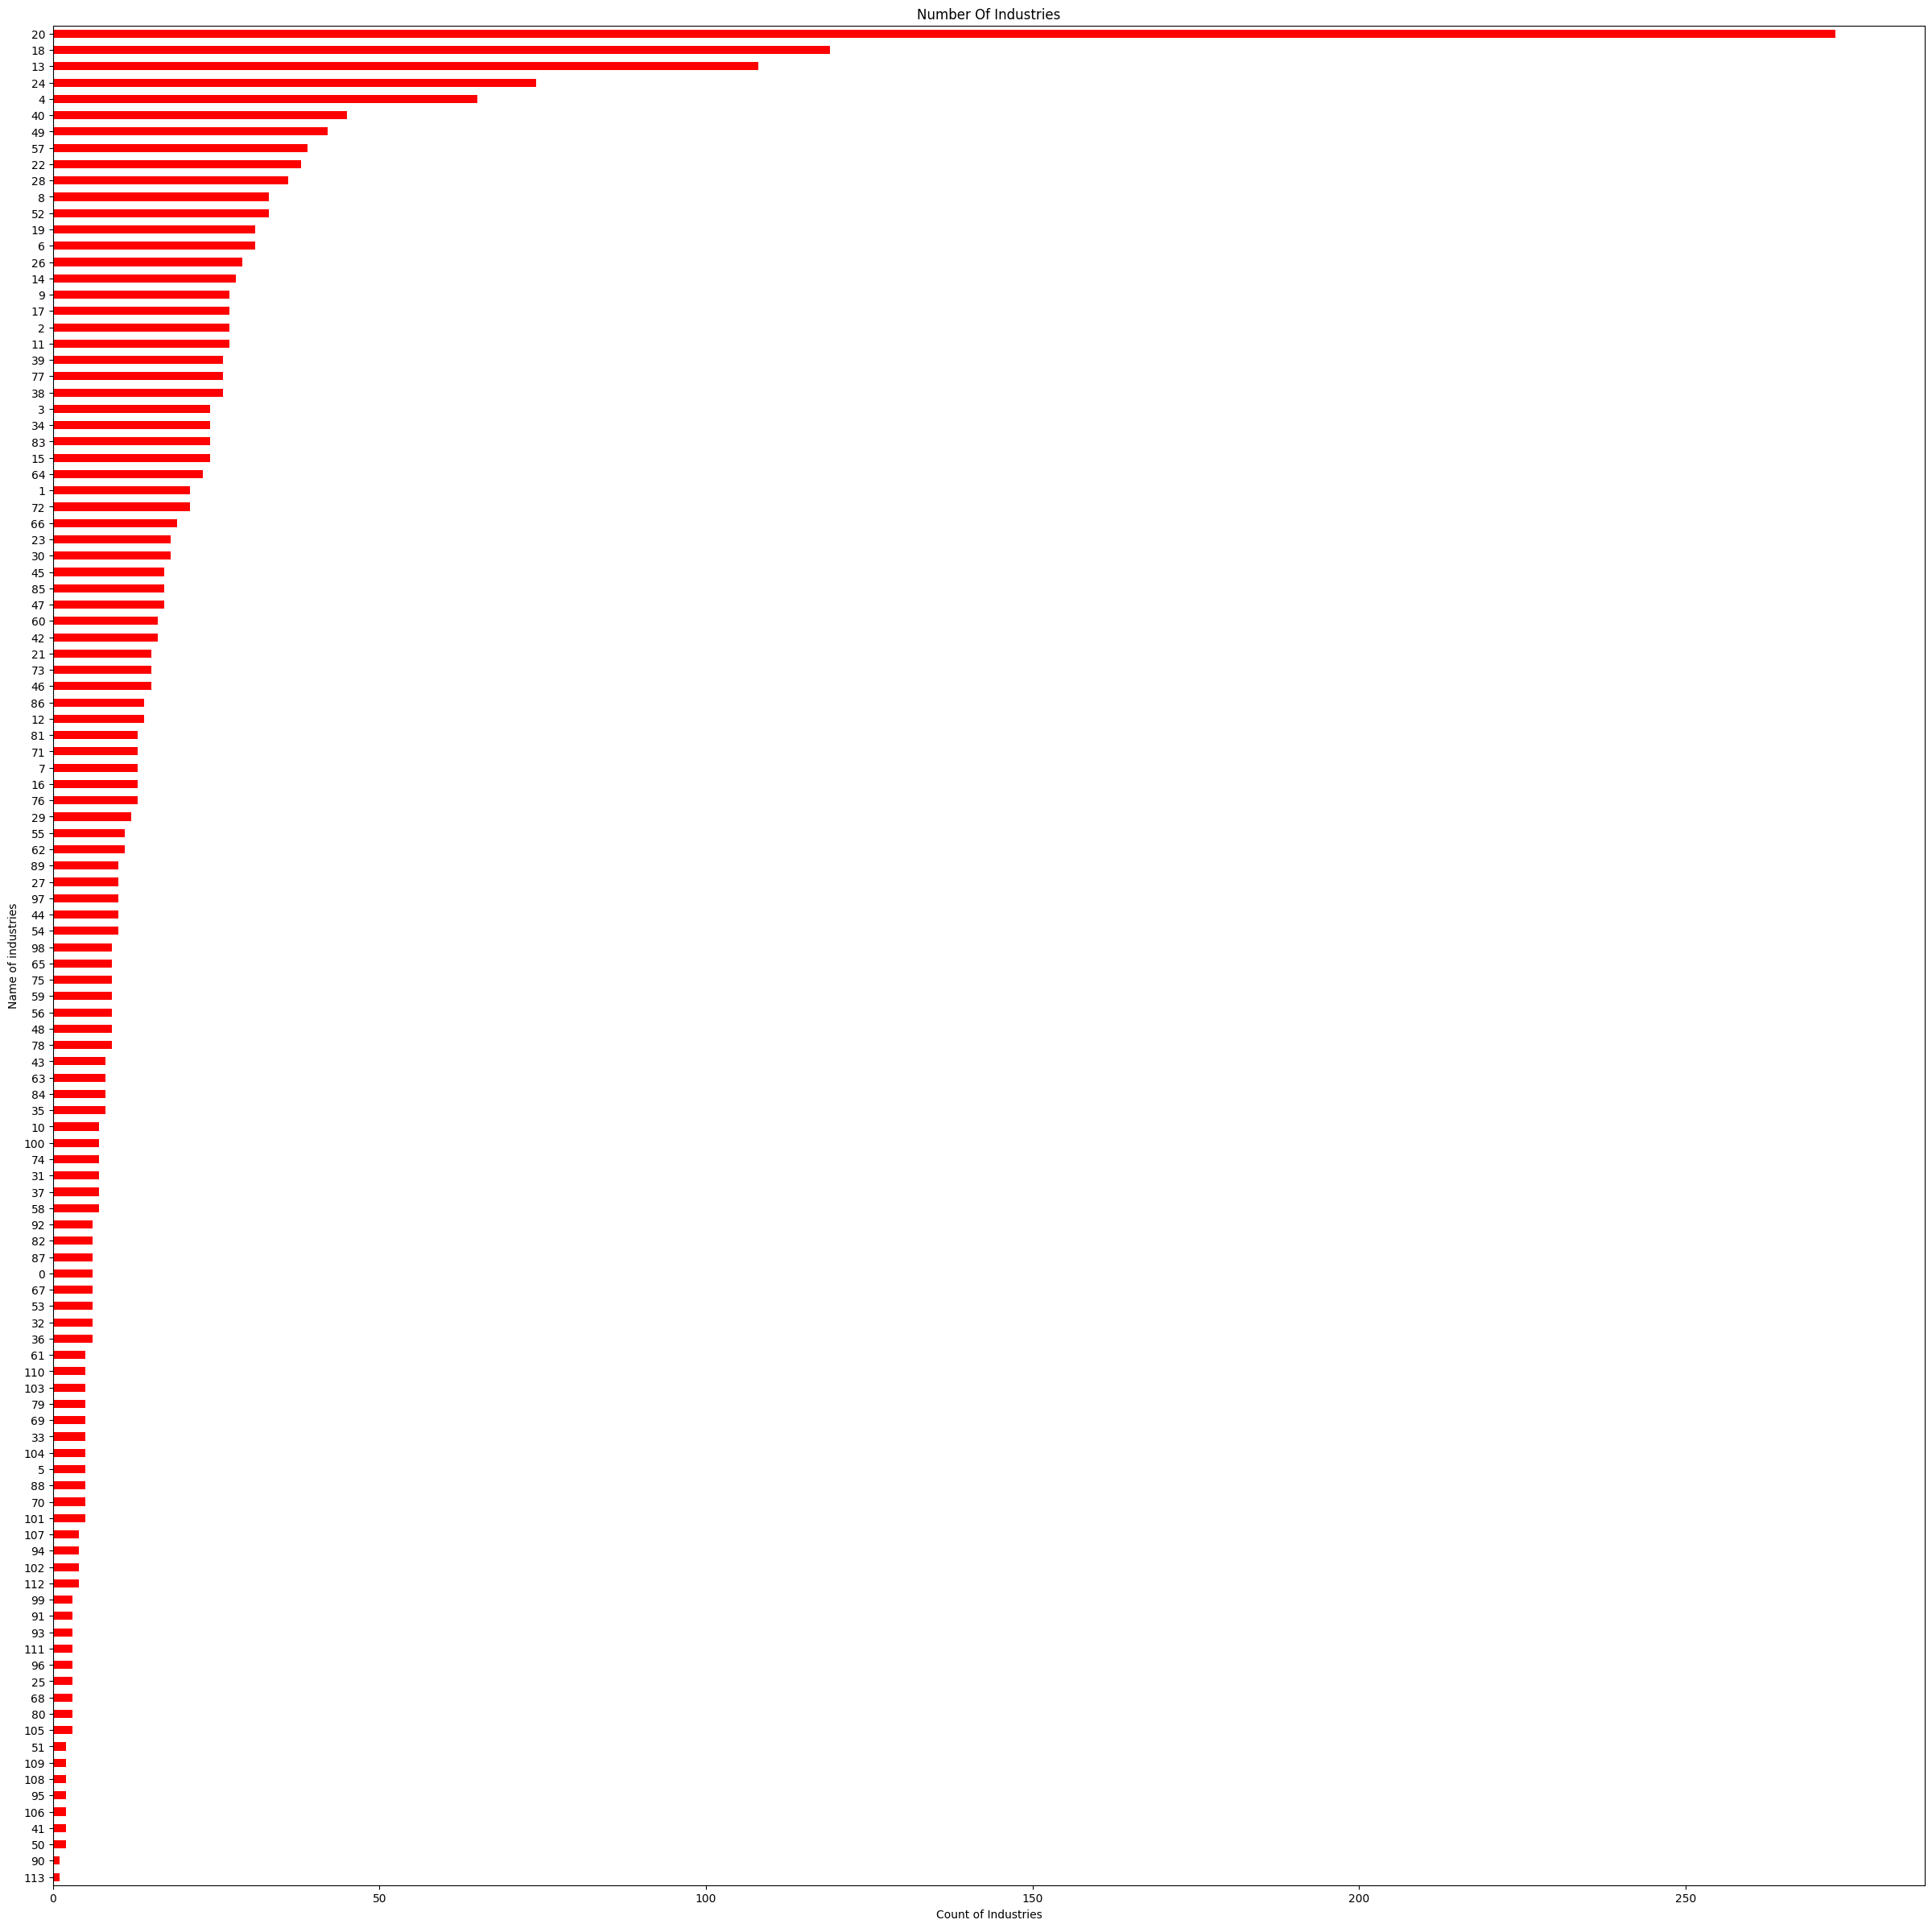

In [32]:
plt.figure(figsize=(30,30))
ind_train.plot(kind='barh',color='red')
plt.xlabel("Count of Industries")
plt.ylabel("Name of industries")
plt.title("Number Of Industries")
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

print('Cross validation R2 scores for each target:\n')
cross_val_score_results = {}
for target in targets:
    scores = cross_val_score(model, train, targets[target], cv=3, scoring='r2')
    score = np.round(np.mean(scores), 2)
    cross_val_score_results[target] = score
    print(f'{target} -> {score}')
print(f'\nMean R2 score across all targets: {np.mean(list(cross_val_score_results.values()))}')


Cross validation R2 scores for each target:

Q0_TOTAL_ASSETS -> -391975709.33
Q0_TOTAL_LIABILITIES -> -427226444.14
Q0_TOTAL_STOCKHOLDERS_EQUITY -> -906627739.7
Q0_GROSS_PROFIT -> -853987479.76
Q0_COST_OF_REVENUES -> -4650503.01
Q0_REVENUES -> -29461973.02
Q0_OPERATING_INCOME -> -6285561254.35
Q0_OPERATING_EXPENSES -> -105997263.26
Q0_EBITDA -> -690817001.92

Mean R2 score across all targets: -1077367263.1655555


In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

print('Cross validation R2 scores for each target:\n')
cross_val_score_results = {}
for target in targets:
    scores = cross_val_score(model, train, targets[target], cv=3, scoring='r2')
    score = np.round(np.mean(scores), 2)
    cross_val_score_results[target] = score
    print(f'{target} -> {score}')
print(f'\nMean R2 score across all targets: {np.mean(list(cross_val_score_results.values()))}')


Cross validation R2 scores for each target:

Q0_TOTAL_ASSETS -> 0.74
Q0_TOTAL_LIABILITIES -> 0.69
Q0_TOTAL_STOCKHOLDERS_EQUITY -> 0.8
Q0_GROSS_PROFIT -> 0.86
Q0_COST_OF_REVENUES -> 0.91
Q0_REVENUES -> 0.95
Q0_OPERATING_INCOME -> 0.76
Q0_OPERATING_EXPENSES -> 0.84
Q0_EBITDA -> 0.48

Mean R2 score across all targets: 0.7811111111111111


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

print('Cross validation R2 scores for each target:\n')
cross_val_score_results = {}
for target in targets:
    scores = cross_val_score(model, train, targets[target], cv=3, scoring='r2')
    score = np.round(np.mean(scores), 2)
    cross_val_score_results[target] = score
    print(f'{target} -> {score}')
print(f'\nMean R2 score across all targets: {np.mean(list(cross_val_score_results.values()))}')


Cross validation R2 scores for each target:

Q0_TOTAL_ASSETS -> 0.71
Q0_TOTAL_LIABILITIES -> 0.79
Q0_TOTAL_STOCKHOLDERS_EQUITY -> 0.88
Q0_GROSS_PROFIT -> 0.76
Q0_COST_OF_REVENUES -> 0.9
Q0_REVENUES -> 0.96
Q0_OPERATING_INCOME -> 0.7
Q0_OPERATING_EXPENSES -> 0.88
Q0_EBITDA -> 0.47

Mean R2 score across all targets: 0.7833333333333333


In [40]:
from sklearn.svm import SVR

model = SVR()

print('Cross validation R2 scores for each target:\n')
cross_val_score_results = {}
for target in targets:
    scores = cross_val_score(model, train, targets[target], cv=3, scoring='r2')
    score = np.round(np.mean(scores), 2)
    cross_val_score_results[target] = score
    print(f'{target} -> {score}')
print(f'\nMean R2 score across all targets: {np.mean(list(cross_val_score_results.values()))}')


Cross validation R2 scores for each target:

Q0_TOTAL_ASSETS -> -0.03
Q0_TOTAL_LIABILITIES -> -0.04
Q0_TOTAL_STOCKHOLDERS_EQUITY -> -0.01
Q0_GROSS_PROFIT -> -0.06
Q0_COST_OF_REVENUES -> -0.05
Q0_REVENUES -> -0.06
Q0_OPERATING_INCOME -> -0.03
Q0_OPERATING_EXPENSES -> -0.05
Q0_EBITDA -> -0.0

Mean R2 score across all targets: -0.03666666666666667


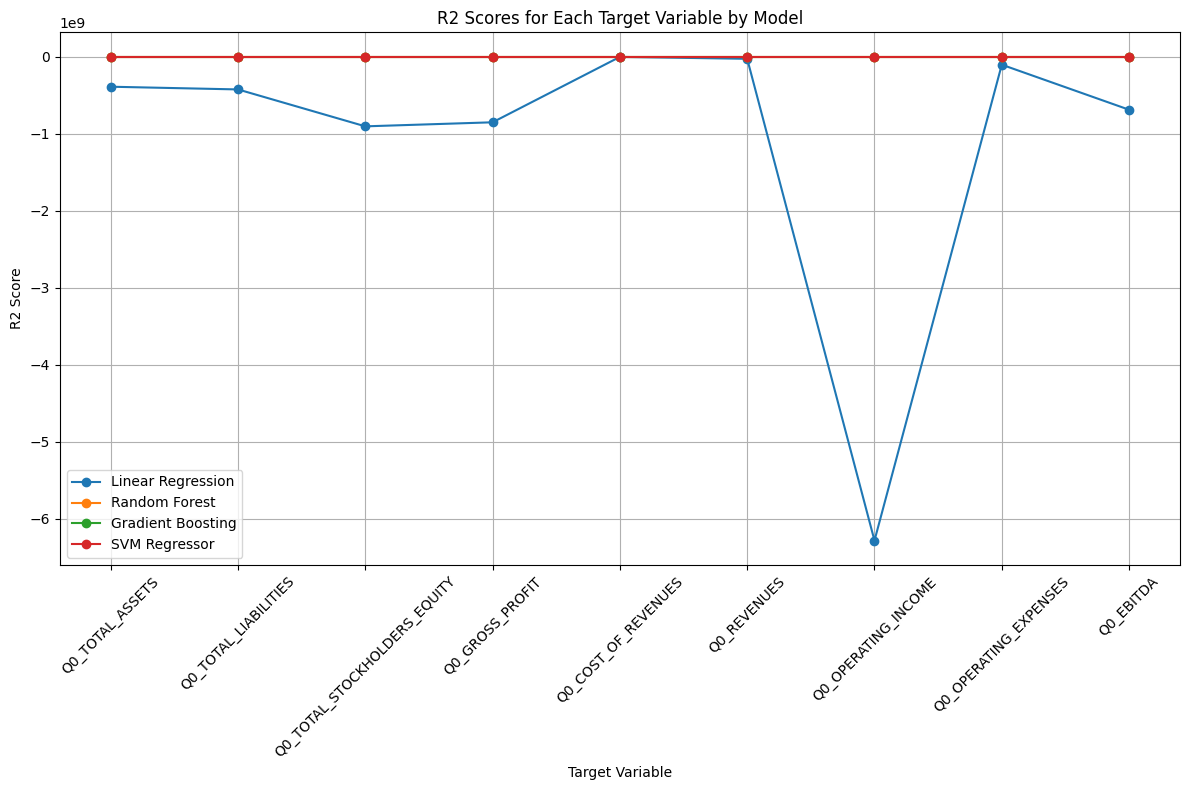

In [41]:
import matplotlib.pyplot as plt

linear_regression_scores = {
    'Q0_TOTAL_ASSETS': -391975709.33,
    'Q0_TOTAL_LIABILITIES': -427226444.14,
    'Q0_TOTAL_STOCKHOLDERS_EQUITY': -906627739.7,
    'Q0_GROSS_PROFIT': -853987479.76,
    'Q0_COST_OF_REVENUES': -4650503.01,
    'Q0_REVENUES': -29461973.02,
    'Q0_OPERATING_INCOME': -6285561254.35,
    'Q0_OPERATING_EXPENSES': -105997263.26,
    'Q0_EBITDA': -690817001.92
}

random_forest_scores = {
    'Q0_TOTAL_ASSETS': 0.74,
    'Q0_TOTAL_LIABILITIES': 0.69,
    'Q0_TOTAL_STOCKHOLDERS_EQUITY': 0.8,
    'Q0_GROSS_PROFIT': 0.86,
    'Q0_COST_OF_REVENUES': 0.91,
    'Q0_REVENUES': 0.95,
    'Q0_OPERATING_INCOME': 0.76,
    'Q0_OPERATING_EXPENSES': 0.84,
    'Q0_EBITDA': 0.48
}

gradient_boosting_scores = {
    'Q0_TOTAL_ASSETS': 0.71,
    'Q0_TOTAL_LIABILITIES': 0.79,
    'Q0_TOTAL_STOCKHOLDERS_EQUITY': 0.88,
    'Q0_GROSS_PROFIT': 0.76,
    'Q0_COST_OF_REVENUES': 0.9,
    'Q0_REVENUES': 0.96,
    'Q0_OPERATING_INCOME': 0.7,
    'Q0_OPERATING_EXPENSES': 0.88,
    'Q0_EBITDA': 0.47
}

svm_regressor_scores = {
    'Q0_TOTAL_ASSETS': -0.03,
    'Q0_TOTAL_LIABILITIES': -0.04,
    'Q0_TOTAL_STOCKHOLDERS_EQUITY': -0.01,
    'Q0_GROSS_PROFIT': -0.06,
    'Q0_COST_OF_REVENUES': -0.05,
    'Q0_REVENUES': -0.06,
    'Q0_OPERATING_INCOME': -0.03,
    'Q0_OPERATING_EXPENSES': -0.05,
    'Q0_EBITDA': -0.0
}

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVM Regressor']
scores = [linear_regression_scores, random_forest_scores, gradient_boosting_scores, svm_regressor_scores]

plt.figure(figsize=(12, 8))

for model, score in zip(models, scores):
    plt.plot(list(score.keys()), list(score.values()), marker='o', label=model)

plt.title('R2 Scores for Each Target Variable by Model')
plt.xlabel('Target Variable')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


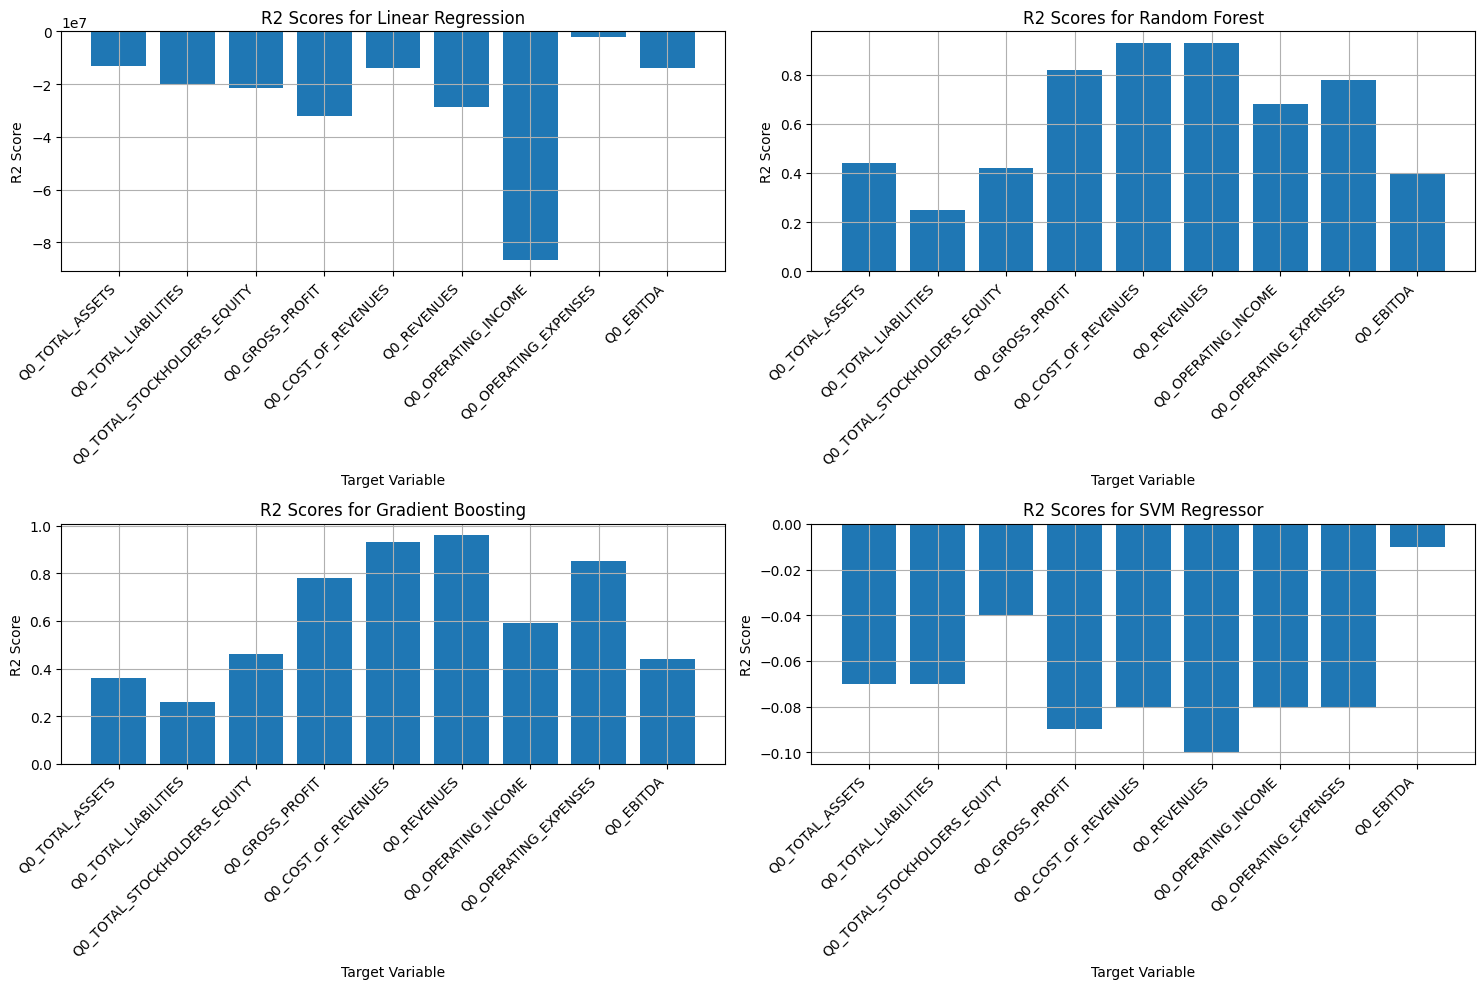

In [42]:
import matplotlib.pyplot as plt

linear_regression_scores = {
    'Q0_TOTAL_ASSETS': -13005293.6,
    'Q0_TOTAL_LIABILITIES': -20446090.51,
    'Q0_TOTAL_STOCKHOLDERS_EQUITY': -21343806.39,
    'Q0_GROSS_PROFIT': -32041459.17,
    'Q0_COST_OF_REVENUES': -13726930.72,
    'Q0_REVENUES': -28759686.75,
    'Q0_OPERATING_INCOME': -86652356.36,
    'Q0_OPERATING_EXPENSES': -2041202.29,
    'Q0_EBITDA': -13800908.57
}

random_forest_scores = {
    'Q0_TOTAL_ASSETS': 0.44,
    'Q0_TOTAL_LIABILITIES': 0.25,
    'Q0_TOTAL_STOCKHOLDERS_EQUITY': 0.42,
    'Q0_GROSS_PROFIT': 0.82,
    'Q0_COST_OF_REVENUES': 0.93,
    'Q0_REVENUES': 0.93,
    'Q0_OPERATING_INCOME': 0.68,
    'Q0_OPERATING_EXPENSES': 0.78,
    'Q0_EBITDA': 0.4
}

gradient_boosting_scores = {
    'Q0_TOTAL_ASSETS': 0.36,
    'Q0_TOTAL_LIABILITIES': 0.26,
    'Q0_TOTAL_STOCKHOLDERS_EQUITY': 0.46,
    'Q0_GROSS_PROFIT': 0.78,
    'Q0_COST_OF_REVENUES': 0.93,
    'Q0_REVENUES': 0.96,
    'Q0_OPERATING_INCOME': 0.59,
    'Q0_OPERATING_EXPENSES': 0.85,
    'Q0_EBITDA': 0.44
}

svm_regressor_scores = {
    'Q0_TOTAL_ASSETS': -0.07,
    'Q0_TOTAL_LIABILITIES': -0.07,
    'Q0_TOTAL_STOCKHOLDERS_EQUITY': -0.04,
    'Q0_GROSS_PROFIT': -0.09,
    'Q0_COST_OF_REVENUES': -0.08,
    'Q0_REVENUES': -0.1,
    'Q0_OPERATING_INCOME': -0.08,
    'Q0_OPERATING_EXPENSES': -0.08,
    'Q0_EBITDA': -0.01
}

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVM Regressor']
scores = [linear_regression_scores, random_forest_scores, gradient_boosting_scores, svm_regressor_scores]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (model, score) in enumerate(zip(models, scores)):
    axs[i].bar(range(len(score)), list(score.values()), align='center')
    axs[i].set_xticks(range(len(score)))
    axs[i].set_xticklabels(list(score.keys()), rotation=45, ha='right')
    axs[i].set_title(f'R2 Scores for {model}')
    axs[i].set_xlabel('Target Variable')
    axs[i].set_ylabel('R2 Score')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


It is quite evident from here that Random Forest and Gradient Boosting performs the best amongst the rest of the Classification models
We'll use Random Forest for the prediction purpose

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest model
model = RandomForestRegressor()

# Define an empty dictionary to store predictions
preds = {}

# Iterate over each target variable
for target in targets:
    # Fit the model on the training data
    model.fit(train, targets[target])
    # Predict the target variable for the test data
    pred = model.predict(test)
    # Store the predictions in the dictionary
    preds[target] = pred
    # Print a message indicating the completion of training and prediction for the current target
    print(f'Finished train/predict for: {target}')


Finished train/predict for: Q0_TOTAL_ASSETS
Finished train/predict for: Q0_TOTAL_LIABILITIES
Finished train/predict for: Q0_TOTAL_STOCKHOLDERS_EQUITY
Finished train/predict for: Q0_GROSS_PROFIT
Finished train/predict for: Q0_COST_OF_REVENUES
Finished train/predict for: Q0_REVENUES
Finished train/predict for: Q0_OPERATING_INCOME
Finished train/predict for: Q0_OPERATING_EXPENSES
Finished train/predict for: Q0_EBITDA


In [45]:
sub = pd.read_csv('C:/Users/RC PRASAD/Desktop/python ws/kaggle como/financial-performance-prediction/sample_submission.csv')

In [46]:
sub.Id == test.Id

0      True
1      True
2      True
3      True
4      True
       ... 
401    True
402    True
403    True
404    True
405    True
Name: Id, Length: 406, dtype: bool

In [47]:
for target in preds:
    sub[target] = preds[target]
sub.head()

,Id,Q0_REVENUES,Q0_COST_OF_REVENUES,Q0_GROSS_PROFIT,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_OPERATING_INCOME,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY
0,480,2.911950e+03,1.274200e+02,6.289510e+03,5.186027e+05,-5.833387e+05,-455256.84,2.906349e+06,5.036240e+06,2.740282e+06
1,573,5.991116e+08,3.670068e+08,2.181676e+08,1.027675e+08,1.025528e+08,41580160.00,3.783362e+09,1.478095e+09,3.598863e+08
2,1967,6.868196e+06,2.448243e+06,7.621312e+05,1.115693e+06,-3.235600e+06,-2882016.66,2.003560e+07,1.253479e+07,5.057227e+06
3,57,4.442864e+08,2.592824e+08,1.684192e+08,8.377864e+07,8.148129e+07,78749570.00,5.618702e+09,2.769366e+09,3.222787e+09
4,131,1.037140e+09,8.391104e+08,2.122320e+08,8.452599e+07,1.165004e+08,79113861.16,4.334562e+09,3.117005e+09,1.176811e+09


In [48]:
sub.to_csv('submission.csv', index = False)